In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

# SELLER P&L ANALYSIS

The goal of this exercise is to compute, for each `seller_id`:

- The **revenue** it brings (10% of each sales + 80 BRL per month)
- The **cost** associated with all its bad reviews (1-star = 100 BRL, 2-star = 50, 3-star=40)
- The resulting **profit** made by Olist for each seller

❓ Let's not start all again from scratch! Import your seller training set and investigate what you already have.


In [48]:
from olist.data import Olist
from olist.seller import Seller
from olist.order import Order
olist = Olist()
seller = Seller()
order = Order()

In [49]:
sellers = seller.get_training_data()
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,review_score,n_orders,quantity,quantity_per_order,sales
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,1.514329,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,0.333333,0.333333,3.00,3,3,1.000,218.70
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.155190,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,0.050000,0.725000,4.55,40,41,1.025,11703.07
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.000000,1.000000,5.00,1,1,1.000,158.00
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.000000,1.000000,5.00,1,1,1.000,79.99
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,1.000000,0.000000,1.00,1,1,1.000,167.99


In [50]:
matching_table = olist.get_matching_table()
matching_table.head()

,order_id,review_id,customer_id,product_id,seller_id
0,e481f51cbdc54678b7cc49136f2d6af7,a54f0611adc9ed256b57ede6b6eb5114,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9
1,128e10d95713541c87cd1a2e48201934,b46f1e34512b0f4c74a72398b03ca788,a20e8105f23924cd00833fd87daa0831,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9
2,0e7e841ddf8f8f2de2bad69267ecfbcf,dc90f19c2806f1abba9e72ad3c350073,26c7ac168e1433912a51b924fbd34d34,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9
3,bfc39df4f36c3693ff3b63fcbea9e90a,1bafb430e498b939f258b9c9dbdff9b1,53904ddbea91e1e92b2b3f1d09a7af86,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9
4,53cdb2fc8bc7dce0b6741e2150273451,8d5266042046a06655c8db133d120ba5,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962


In [51]:
orders = order.get_review_score()
orders.head()

,order_id,dim_is_five_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5


❓ What is missing? Write down a strategy to get your missing columns, by re-using as much of  what has already been coded in `seller.py` as possible

### Cost

In [52]:
orders = orders.merge(matching_table[['order_id', 'seller_id']], on='order_id')
orders.head()

,order_id,dim_is_five_star,dim_is_one_star,review_score,seller_id
0,73fc7af87114b39712e6da79b0a377eb,0,0,4,6d803cb79cc31c41c4c789a75933b3c7
1,73fc7af87114b39712e6da79b0a377eb,0,0,4,6d803cb79cc31c41c4c789a75933b3c7
2,a548910a1c6147796b98fdf73dbeba33,1,0,5,8e6d7754bc7e0f22c96d255ebda59eba
3,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5,a1043bafd471dff536d0c462352beb48
4,658677c97b385a9be170737859d3511b,1,0,5,a1043bafd471dff536d0c462352beb48


In [55]:
# 1 star = 100, 2 star = 50, 3 star = 40, 4/5 star = 0

orders['cost'] = orders['review_score'].map({
    5: 0,
    4: 0,
    3: 40,
    2: 50,
    1: 100
})

orders.head()

,order_id,dim_is_five_star,dim_is_one_star,review_score,seller_id,cost
0,73fc7af87114b39712e6da79b0a377eb,0,0,4,6d803cb79cc31c41c4c789a75933b3c7,0
1,73fc7af87114b39712e6da79b0a377eb,0,0,4,6d803cb79cc31c41c4c789a75933b3c7,0
2,a548910a1c6147796b98fdf73dbeba33,1,0,5,8e6d7754bc7e0f22c96d255ebda59eba,0
3,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5,a1043bafd471dff536d0c462352beb48,0
4,658677c97b385a9be170737859d3511b,1,0,5,a1043bafd471dff536d0c462352beb48,0


In [56]:
orders_grouped = orders.groupby('seller_id').sum()[['cost']]
orders_grouped.head()

,cost
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,100
001cca7ae9ae17fb1caed9dfb1094831,4990
001e6ad469a905060d959994f1b41e4f,100
002100f778ceb8431b7a1020ff7ab48f,1110
003554e2dce176b5555353e4f3555ac8,0


In [57]:
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,review_score,n_orders,quantity,quantity_per_order,sales
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,1.514329,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,0.333333,0.333333,3.00,3,3,1.000,218.70
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.155190,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,0.050000,0.725000,4.55,40,41,1.025,11703.07
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.000000,1.000000,5.00,1,1,1.000,158.00
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.000000,1.000000,5.00,1,1,1.000,79.99
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,1.000000,0.000000,1.00,1,1,1.000,167.99


In [58]:
sellers = sellers.merge(orders_grouped, on='seller_id')
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,review_score,n_orders,quantity,quantity_per_order,sales,cost
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,1.514329,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,0.333333,0.333333,3.00,3,3,1.000,218.70,140
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.155190,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,0.050000,0.725000,4.55,40,41,1.025,11703.07,240
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.000000,1.000000,5.00,1,1,1.000,158.00,0
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.000000,1.000000,5.00,1,1,1.000,79.99,0
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,1.000000,0.000000,1.00,1,1,1.000,167.99,100


### Revenue

In [18]:
# The revenue it brings (10% of each sales + 80 BRL per month)

In [20]:
np.timedelta64(1, 'M')

numpy.timedelta64(1,'M')

In [24]:
sellers['months_on_olist'] = np.ceil((sellers['date_last_sale'] - sellers['date_first_sale']) / np.timedelta64(1, 'M'))

# np.where( CONDITION , VALUE IF TRUE , VALUE IF FALSE )
sellers['months_on_olist'] = np.where(sellers['months_on_olist'] == 0, 1, sellers['months_on_olist'])
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,cost,months_on_olist
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,1.514329,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,0.333333,0.333333,3.00,140,3,3,1.000,218.70,140,4.0
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.155190,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,0.050000,0.725000,4.55,240,40,41,1.025,11703.07,140,15.0
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.000000,1.000000,5.00,0,1,1,1.000,158.00,0,1.0
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.000000,1.000000,5.00,0,1,1,1.000,79.99,0,1.0
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,1.000000,0.000000,1.00,100,1,1,1.000,167.99,100,1.0


In [25]:
sellers['revenue'] = 80 * sellers['months_on_olist'] + 0.1 * sellers['sales']
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,cost,months_on_olist,revenue
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,1.514329,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,0.333333,0.333333,3.00,140,3,3,1.000,218.70,140,4.0,341.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.155190,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,0.050000,0.725000,4.55,240,40,41,1.025,11703.07,140,15.0,2370.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.000000,1.000000,5.00,0,1,1,1.000,158.00,0,1.0,95.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.000000,1.000000,5.00,0,1,1,1.000,79.99,0,1.0,87.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,1.000000,0.000000,1.00,100,1,1,1.000,167.99,100,1.0,96.799


❓ Update `seller.py` accordingly

In [26]:
# 

❓ Compute seller profits

In [27]:
sellers['profit'] = sellers['revenue'] - sellers['cost']
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,cost,months_on_olist,revenue,profit
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,1.514329,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,0.333333,0.333333,3.00,140,3,3,1.000,218.70,140,4.0,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.155190,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,0.050000,0.725000,4.55,240,40,41,1.025,11703.07,140,15.0,2370.307,2230.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.000000,1.000000,5.00,0,1,1,1.000,158.00,0,1.0,95.800,95.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.000000,1.000000,5.00,0,1,1,1.000,79.99,0,1.0,87.999,87.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,1.000000,0.000000,1.00,100,1,1,1.000,167.99,100,1.0,96.799,-3.201


❓ Sort sellers by profit, and analyse their profitability: conclude on a possible strategy for Olist!

In [28]:
sorted_sellers = sellers.sort_values('profit').reset_index()
sorted_sellers.head()

,index,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,cost,months_on_olist,revenue,profit
0,453,1f50f920176fa81dab994f9023523100,sao jose do rio preto,SP,0.099875,15.571831,2017-04-03 22:15:14,2018-08-28 03:45:18,0.113556,0.598297,4.123492,22270,1404,1931,1.375356,106939.21,38340,17.0,12053.921,-26286.079
1,769,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,0.008210,9.539486,2017-02-17 07:45:11,2018-08-29 09:25:12,0.127957,0.510215,3.922043,36270,1854,2033,1.096548,123304.83,38660,19.0,13850.483,-24809.517
2,1133,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,SP,0.635673,22.392546,2017-01-26 22:55:10,2018-08-08 03:10:34,0.200405,0.350202,3.484818,28530,982,1364,1.389002,187923.89,44350,19.0,20312.389,-24037.611
3,2360,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,0.099462,14.416471,2017-01-08 09:45:12,2018-08-27 11:04:18,0.147640,0.476948,3.804610,40890,1806,1987,1.100221,200472.92,45160,20.0,21647.292,-23512.708
4,1214,d2374cbcbb3ca4ab1086534108cc3ab7,ibitinga,SP,0.153895,14.297115,2017-02-10 15:50:20,2018-08-22 04:04:20,0.155844,0.454545,3.727273,13070,524,631,1.204198,21223.92,20770,19.0,3642.392,-17127.608


<AxesSubplot:>

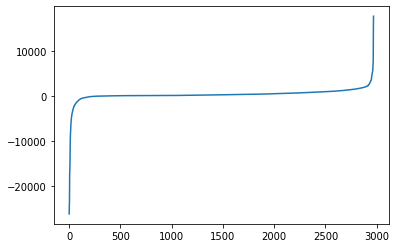

In [29]:
sorted_sellers['profit'].plot()

<AxesSubplot:>

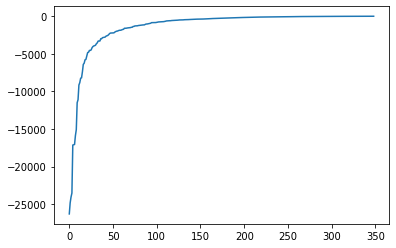

In [32]:
sorted_sellers[sorted_sellers['profit'] < 0]['profit'].plot()